# Example use of pretrained EfficientNet to attempt to classifiy difficult images

In this simple example, we load several images, chop up a tiled image, pre-process it, and classify it with a pretrained EfficientNet.

A modification to the lukmelas example: https://github.com/lukemelas/EfficientNet-PyTorch/tree/2eb7a7d264344ddf15d0a06ee99b0dca524c6a07/examples/simple

In [1]:
import json
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

In [2]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

In [14]:
import requests
import shutil

files = ['BagelDog.jpg','ChihuahuaMuffin.jpg']
urls = ['http://static.boredpanda.com/blog/wp-content/uploads/2016/03/dog-food-comparison-bagel-muffin-lookalike-teenybiscuit-karen-zack__700.jpg',
       'https://i.pinimg.com/originals/bc/b5/5a/bcb55af1a72d37ad406c4a6def58d69c.jpg'
       ]
for file_name, url in zip ( files, urls):
    res = requests.get(url, stream = True)
    if res.status_code == 200:
        with open(file_name,'wb') as f:
            shutil.copyfileobj(res.raw, f)
        print('Image sucessfully Downloaded: ',file_name)
    else:
        print('Image Couldn\'t be retrieved:', file_name)

Image sucessfully Downloaded:  BagelDog.jpg
Image sucessfully Downloaded:  ChiwawaMuffin.jpg
Image sucessfully Downloaded:  labels_map.txt


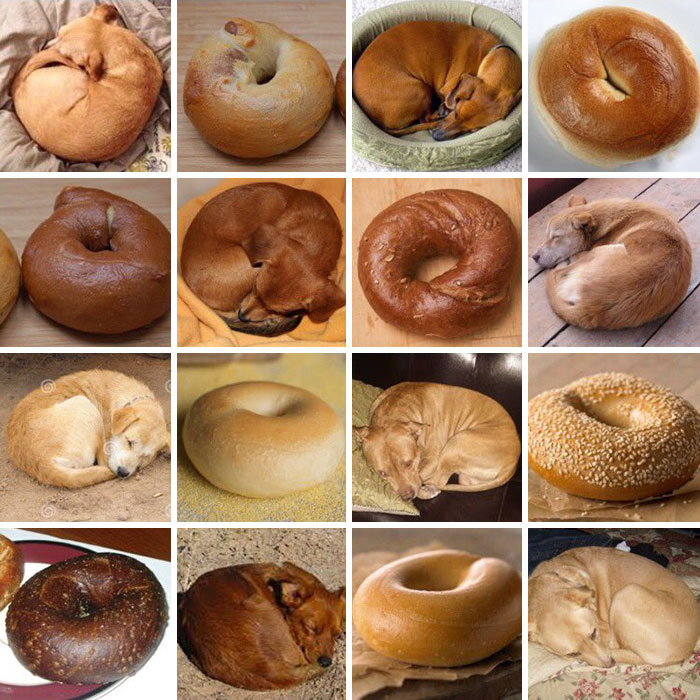

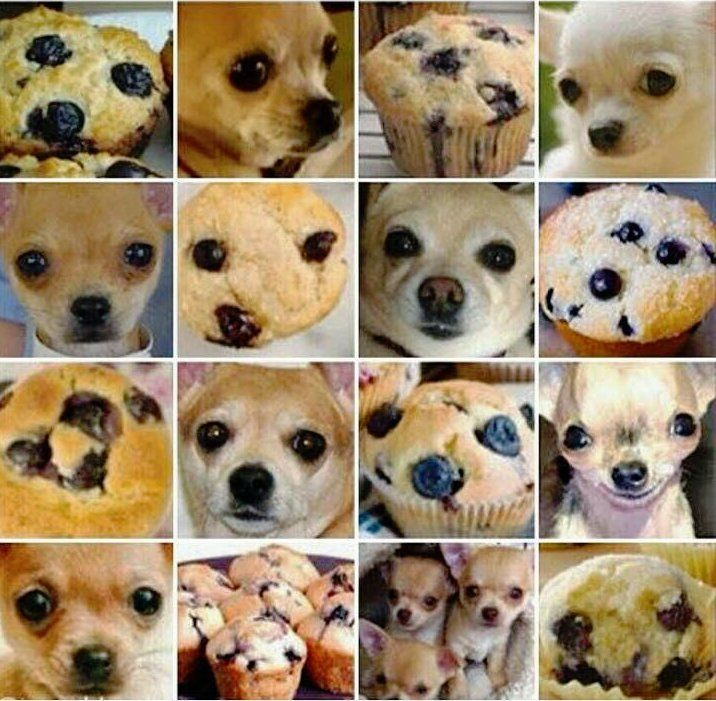

In [4]:
# Open image
#img = Image.open('img.jpg')
dog_bagel_tiles = Image.open('BagelDog.jpg')
display(dog_bagel_tiles)
chihuahua_muffin_tiles = Image.open('chihuahuaMuffin.jpg')
display(chihuahua_muffin_tiles)

In [5]:
# Split the dogs and bagels into a list
imgwidth, imgheight = dog_bagel_tiles.size
height = int (imgheight / 4)
width = int (imgwidth / 4)

dogbagel=[]

for i in range(0,imgheight,height):
    for j in range(0,imgwidth,width):
        box = (j, i, j+width, i+height)
        dogbagel.append(dog_bagel_tiles.crop(box))
# Split the Chihuahuas and muffins into a list
imgwidth, imgheight = chihuahua_muffin_tiles.size
height = int (imgheight / 4)
width = int (imgwidth / 4)

chihuahuamuffin=[]

for i in range(0,imgheight,height):
    for j in range(0,imgwidth,width):
        box = (j, i, j+width, i+height)
        chihuahuamuffin.append(chihuahua_muffin_tiles.crop(box))


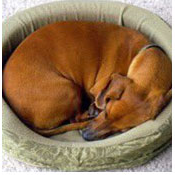

In [6]:
#Check that we can see individual tile
dogbagel[2]

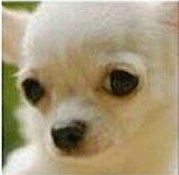

In [7]:
#Check that we can see individual tile
chihuahuamuffin[3]

In [8]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [ ]:
# Classify with EfficientNet
def Classify(img):
    display(img)
    # Preprocess image
    tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
    img = tfms(img).unsqueeze(0)
    model = EfficientNet.from_pretrained(model_name)
    model.eval()
    with torch.no_grad():
        logits = model(img)
    preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

    print('-----')
    for idx in preds:
        label = labels_map[idx]
        prob = torch.softmax(logits, dim=1)[0, idx].item()
        print('{:<75} ({:.2f}%)'.format(label, prob*100))

In [ ]:
for i in range(16):
    Classify(  dogbagel[i] )


In [ ]:
for i in range(16):
    Classify(  chihuahuamuffin[i] )